# Kindig et al. (2009): Isolated rib anterior-posterior bending



- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 28th december 2023 
- SAFER HBM Version:
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `smp_s_11.1`

## Experiment by Kindig et al. (2009)

### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kindig et al.  <sup>[1]</sup>
1. Kindig MW. Tolerance to failure and geometric influences on the stiffness of human ribs under anterior-posterior loading (Doctoral dissertation, University of Virginia).

<!-- ![Isometric view](../_env/setup_R6_V11.PNG) -->
<!-- ![Front View](../dyna_kindig_setups/setup.PNG) $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ -->
```{figure} ../_env/setup_R6_V11.PNG
---
align: center
---
Setup for isolated Rib 6 test
```
<!-- (Setup for isolated Rib 6 test) -->


## Experiment

### Information on the subjects/specimens

| **Subject ID** | **Age [years]** | **Sex** | **Stature [cm]** | **Body-mass [kg]** |
|:--------------:|:---------------:|:-------:|:----------------:|:------------------:|
|       229      |        61       |    F    |        174       |        82.6        |
|       323      |        44       |    M    |        172       |        77.1        |
|       364      |        63       |    F    |        172       |        117.9       |
|       412      |        62       |    M    |        175       |        68.5        |
|       413      |        54       |    M    |        15        |         68         |
|       419      |        31       |    M    |        193       |         90         |
|       425      |        54       |    M    |        177       |        78.5        |
|       426      |        57       |    M    |        184       |        76.2        |
|       428      |        57       |    M    |        175       |        63.5        |


### Loading and Boundary Conditions
- Each rib end is fully constrained in a rigid pot of similar size as was used in the physical tests. 
- The end of the rib was positioned at the centre of the potting of the simulation model. 
- The anterior rib has is positioned based on lateral offset to the posterior end. 
- The pots are only allowed to rotate freely about the y-axis, the anterior bracket is aloowed to move in the Z-axis and the posterior bracted is fixedin all directions.
- Load in the anterior-posterior direction at a velocity of 1 m/s is prescribed.

### Responses recorded
- Reaction force is measured at the posterior end.
- Displacement of the anterior potting

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [1]:
import os
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s10= {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" :0.7,"linewidth":1}
pmhs_marked = {"linestyle" :'--', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 20}
test_corr = {"color": 'k',"alpha" : 0.2,'linewidth':0.0}
Test_avg_norm = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75,'mfc': 'seagreen','mec': 'seagreen'}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
SHBM_version='11.0'
binout_path_sim={}
result_output_dir={}

Ribs=["Rib2","Rib3","Rib4","Rib5","Rib6","Rib7","Rib8","Rib9","Rib10"]


figures_dir = "../data/processed/SAFER{}/figures/".format(SHBM_version)
processed_data_dir = "../data/processed/SAFER{}/".format(SHBM_version)
experiment_dir= "../data/experiment_data/"

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for Rib in Ribs:
    binout_path_sim[Rib] = Rib
    result_output_dir[Rib] = os.path.join(processed_data_dir, binout_path_sim[Rib])
    if not os.path.exists(result_output_dir[Rib]): 
        os.makedirs(result_output_dir[Rib])


## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_impactor_IDs.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/03_calculation_kindig2009.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [7]:
sim_output={}
for rib in Ribs:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[rib] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[rib], filename="Dynasaur_output.csv")
    sim_output[rib]=pd.read_csv(os.path.join(result_output_dir[rib],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_impactor_IDs.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'potting_A_Disp_z', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'potting_P_Disp_z', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'potting_P_coor_z', 'x_label': 'time', 'y_label': 'coordinate'}, {'visualization': 'potting_A_coor_z', 'x_label': 'time', 'y_label': 'coordinate'}, {'visualization': 'potting_Force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_lab

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib2
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib2\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib3
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib3\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib4
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib4\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib5
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib5\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib6
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib6\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib7
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib7\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib8
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib8\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib9
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib9\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kindig2009.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Rib10
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Rib10\Dynasaur_output.csv


In [8]:
# Import the processed data for visualization as pandas Dataframe
simData_rib2 = pd.read_csv(result_output_dir[Ribs[0]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib3 = pd.read_csv(result_output_dir[Ribs[1]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib4 = pd.read_csv(result_output_dir[Ribs[2]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib5 = pd.read_csv(result_output_dir[Ribs[3]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib6 = pd.read_csv(result_output_dir[Ribs[4]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])
simData_rib7 = pd.read_csv(result_output_dir[Ribs[5]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])
simData_rib8 = pd.read_csv(result_output_dir[Ribs[6]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])
simData_rib9 = pd.read_csv(result_output_dir[Ribs[7]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])
simData_rib10 = pd.read_csv(result_output_dir[Ribs[8]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])

experiment=pd.DataFrame()
path = os.path.join(experiment_dir, '*.txt')
exp_files = glob.glob(path)
for i in range(len(exp_files)):
    df_r=pd.read_csv(exp_files[i], delimiter='\t',names=[str(os.path.splitext(os.path.basename(exp_files[i]))[0])+'_0',str(os.path.splitext(os.path.basename(exp_files[i]))[0])+'_1'])
    experiment=pd.concat([experiment,df_r],axis=1)

## Posterior-reaction force Vs Anterior-displacement

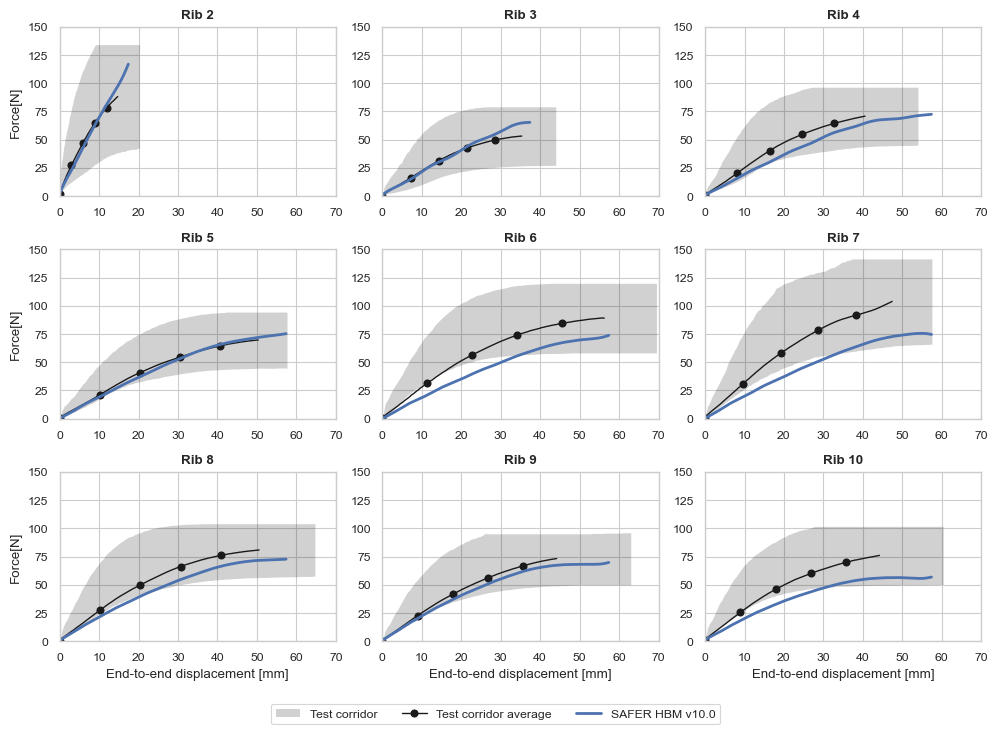

In [9]:
fig_fd, axs = plt.subplots(nrows=3, ncols=3,figsize=(10,7))

axs[0,0].set_ylabel('Force[N]');
axs[1,0].set_ylabel('Force[N]');
axs[2,0].set_ylabel('Force[N]');


axs[2,0].set_xlabel('End-to-end displacement [mm]');
axs[2,1].set_xlabel('End-to-end displacement [mm]');
axs[2,2].set_xlabel('End-to-end displacement [mm]');

i=1
for x in range(3):
    for y in range(3):
        axs[x,y].set_title('Rib {}'.format(i+1),fontweight="bold")
        axs[x,y].set_xlim([0,70])
        axs[x,y].set_ylim([0,150])
        i=i+1

axs[0,0].fill_between(experiment.Rib2_Kindig_cor_0,experiment.Rib2_Kindig_cor_1,**test_corr,label='Test corridor')
axs[0,0].plot(experiment.Rib2_Kindig_avg_0,experiment.Rib2_Kindig_avg_1,**test_avg,label='Test corridor average')
axs[0,0].plot(simData_rib2.potting.A_Disp_z.displacement,simData_rib2.potting.Force.force*1000,**s10,label='SAFER HBM v10.0')

axs[0,1].fill_between(experiment.Rib3_Kindig_cor_0,experiment.Rib3_Kindig_cor_1,**test_corr)
axs[0,1].plot(experiment.Rib3_Kindig_avg_0,experiment.Rib3_Kindig_avg_1,**test_avg)
axs[0,1].plot(simData_rib3.potting.A_Disp_z.displacement,simData_rib3.potting.Force.force*1000,**s10)

axs[0,2].fill_between(experiment.Rib4_Kindig_cor_0,experiment.Rib4_Kindig_cor_1,**test_corr)
axs[0,2].plot(experiment.Rib4_Kindig_avg_0,experiment.Rib4_Kindig_avg_1,**test_avg)
axs[0,2].plot(simData_rib4.potting.A_Disp_z.displacement,simData_rib4.potting.Force.force*1000,**s10)

axs[1,0].fill_between(experiment.Rib5_Kindig_cor_0,experiment.Rib5_Kindig_cor_1,**test_corr)
axs[1,0].plot(experiment.Rib5_Kindig_avg_0,experiment.Rib5_Kindig_avg_1,**test_avg)
axs[1,0].plot(simData_rib5.potting.A_Disp_z.displacement,simData_rib5.potting.Force.force*1000,**s10)

axs[1,1].fill_between(experiment.Rib6_Kindig_cor_0,experiment.Rib6_Kindig_cor_1,**test_corr)
axs[1,1].plot(experiment.Rib6_Kindig_avg_0,experiment.Rib6_Kindig_avg_1,**test_avg)
axs[1,1].plot(simData_rib6.potting.A_Disp_z.displacement,simData_rib6.potting.Force.force*1000,**s10)

axs[1,2].fill_between(experiment.Rib7_Kindig_cor_0,experiment.Rib7_Kindig_cor_1,**test_corr)
axs[1,2].plot(experiment.Rib7_Kindig_avg_0,experiment.Rib7_Kindig_avg_1,**test_avg)
axs[1,2].plot(simData_rib7.potting.A_Disp_z.displacement,simData_rib7.potting.Force.force*1000,**s10)

axs[2,0].fill_between(experiment.Rib8_Kindig_cor_0,experiment.Rib8_Kindig_cor_1,**test_corr)
axs[2,0].plot(experiment.Rib8_Kindig_avg_0,experiment.Rib8_Kindig_avg_1,**test_avg)
axs[2,0].plot(simData_rib8.potting.A_Disp_z.displacement,simData_rib8.potting.Force.force*1000,**s10)

axs[2,1].fill_between(experiment.Rib9_Kindig_cor_0,experiment.Rib9_Kindig_cor_1,**test_corr)
axs[2,1].plot(experiment.Rib9_Kindig_avg_0,experiment.Rib9_Kindig_avg_1,**test_avg)
axs[2,1].plot(simData_rib9.potting.A_Disp_z.displacement,simData_rib9.potting.Force.force*1000,**s10)

axs[2,2].fill_between(experiment.Rib10_Kindig_cor_0,experiment.Rib10_Kindig_cor_1,**test_corr)
axs[2,2].plot(experiment.Rib10_Kindig_avg_0,experiment.Rib10_Kindig_avg_1,**test_avg)
axs[2,2].plot(simData_rib10.potting.A_Disp_z.displacement,simData_rib10.potting.Force.force*1000,**s10)

fig_fd.legend(loc="lower center", bbox_to_anchor=(0.5,-0.05), ncol=3);
fig_fd.tight_layout()

## Energy Plots

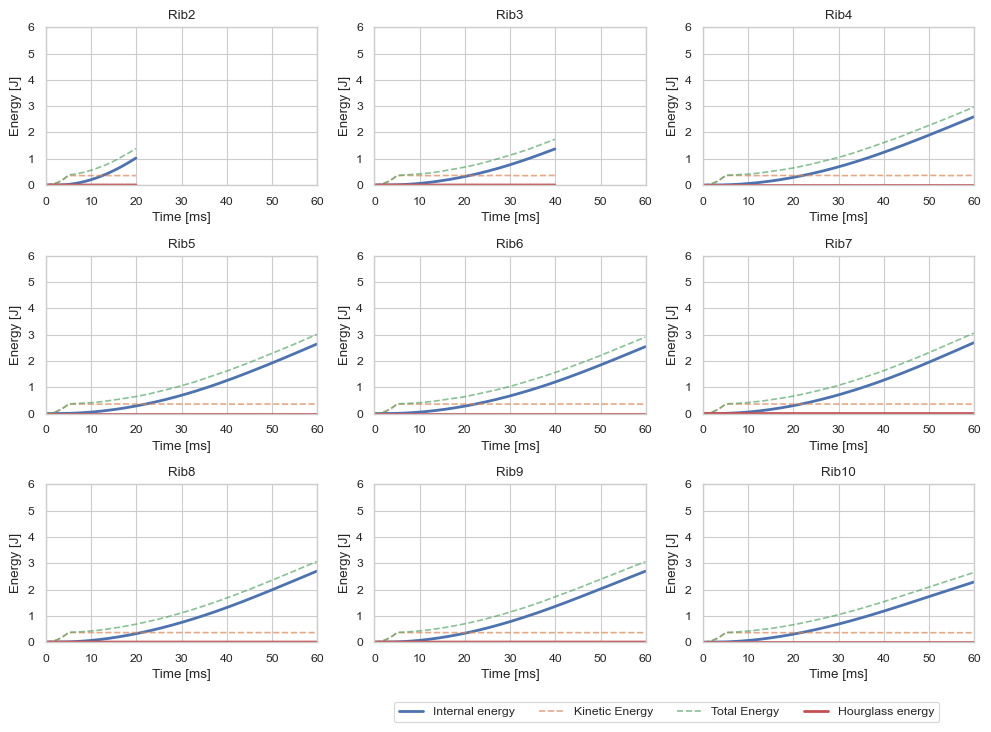

In [13]:
fig_eny, axs = plt.subplots(nrows=3, ncols=3,figsize=(10,7))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Ribs[i]].MODEL.Internal_Energy.time,sim_output[Ribs[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Ribs[i]].MODEL.Kinetic_Energy.time,sim_output[Ribs[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Ribs[i]].MODEL.Total_Energy.time,sim_output[Ribs[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Ribs[i]].MODEL.Hourglass_Energy.time,sim_output[Ribs[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Ribs[i]),xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,60],ylim=[0,6])
    i=i+1

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.95,0),ncols=4);
fig_eny.tight_layout()

In [42]:
fig_fd.savefig(os.path.join(figures_dir, 'Figure_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")